# 01 - Limpieza

## Descripción de los datos

Archivo | Descripción
--------|------------
[listings.csv.gz](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/data/listings.csv.gz) | Detalle de las publicaciones
[calendar.csv.gz](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/data/calendar.csv.gz) | Datos detallados del calendario para las publicaciones
[reviews.csv.gz](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/data/reviews.csv.gz) | Datos detallados de las reseñas
[listings.csv](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/visualisations/listings.csv) | Resumen de información y métricas para las publicaciones
[reviews.csv](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/visualisations/reviews.csv) | Resumen de reseñas 
[neighbourhoods.csv](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/visualisations/neighbourhoods.csv) | Lista de barrios. Procedente de archivos GIS de código abierto o de la ciudad
[neighbourhoods.geojson](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-01-10/visualisations/neighbourhoods.geojson) | Archivo GeoJSON de barrios de la ciudad

[Link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846) con toda la descripción de cada dataset.

El dataset `listings.csv` está dentro de `listings.csv.gz` y también `reviews.csv` está dentro de `reviews.csv.gz`. Se cargan solamente los `.gz`. 

El objetivo de este notebook es limpiar los datasets de registros duplicados, valores nulos, consistencia en el tipo de dato, etc...

In [70]:
# librerias

import numpy as np
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_columns', None)

import pylab as plt
import seaborn as sns

In [12]:
listings=pd.read_csv('../data/raw_data/listings.csv.gz', compression='gzip', low_memory=False)

display(listings.head())

listings.shape

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20200110222856,2020-01-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,If you are a group/family 3 or 4 people we off...,Excelent public transport and easy Access to m...,"Full use of living room, kitchen (with dishwas...","English, spanish, german, russian, some french...",NaN,NaN,NaN,https://a0.muscache.com/im/pictures/683224/4cc...,NaN,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/1c793...,https://a0.muscache.com/im/pictures/user/1c793...,Hispanoamérica,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Madrid, Comunidad de Madrid, Spain",Chamartín,Hispanoamérica,Chamartín,Madrid,Comunidad de Madrid,28016,Madrid,"Madrid, Spain",ES,Spain,40.45628,-3.67763,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,1,1,365,365,1.0,365.0,5 days ago,t,22,52,82,82,2020-01-11,73,14,2010-03-14,2019-12-13,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.61
1,21853,https://www.airbnb.com/rooms/21853,20200110222856,2020-01-11,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,We are a 15 min bus ride away from the Casa de...,The flat is near the centre of Madrid (15 minu...,There is fibre optic internet connection for y...,If I am at home and see each other around here...,Gracias por no fumar en la casa. Es muy import...,NaN,NaN,https://a0.muscache.com/im/pictures/68483181/8...,NaN,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluch

(21495, 106)

In [14]:
calendar=pd.read_csv('../data/raw_data/calendar.csv.gz', compression='gzip', low_memory=False)

display(calendar.head())

calendar.shape

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2020-01-11,f,$80.00,$80.00,1.0,365.0
1,96072,2020-01-11,f,$25.00,$25.00,3.0,365.0
2,96072,2020-01-12,f,$25.00,$25.00,3.0,365.0
3,96072,2020-01-13,f,$25.00,$25.00,3.0,365.0
4,96072,2020-01-14,f,$25.00,$25.00,3.0,365.0


(7845708, 7)

In [15]:
reviews=pd.read_csv('../data/raw_data/reviews.csv.gz', compression='gzip', low_memory=False)

display(reviews.head())

reviews.shape

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


(812726, 6)

In [11]:
geo_neighbourhoods=gpd.read_file('../data/raw_data/neighbourhoods.geojson')

display(geo_neighbourhoods.head())

geo_neighbourhoods.shape

,neighbourhood,neighbourhood_group,geometry
0,Palacio,Centro,"MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40..."
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40..."
2,Cortes,Centro,"MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40..."
3,Justicia,Centro,"MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40..."
4,Universidad,Centro,"MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40..."


(128, 3)

## a) Limpieza listings

Primero, elimino columnas con valores constantes o columnas no informativas. Eliminaré también columnas relacionadas con el host, como `name` o `summary` para evitar sesgos (quizá habría que analizarlas aparte). Veámoslas de una en una.

+ listing_url: Url del piso, con el id nos vale.
+ scrape_id: Id de la extracción de los datos, en realidad es la fecha de extracción.
+ last_scraped: fecha de la última extracción de datos.
+ name: nombre que el host pone al piso.
+ summary: resumen que hace el host sobre el piso.
+ space: descripción que hace el host sobre el piso.
+ description: descripción que hace el host sobre el barrio (detallado).
+ experiences_offered: columna constante, todo nulos.
+ neighborhood_overview: descripción que hace el host sobre el barrio.
+ notes: notas que hace el host.
+ transit: notas que hace el host.
+ access: notas de acceso.
+ interaction: descripción del host de idiomas etc..
+ house_rules: normas de la casa.
+ thumbnail_url: toda la columna nula.
+ medium_url: toda la columna nula.
+ picture_url: Url de la imagen, irrelevante.
+ xl_picture_url: Url de la imagen, irrelevante. toda la columna nula.
+ host_url: Url del host, nos vale el id
+ host_name: nombre del host, irrelevante.
+ host_since: fecha desde ser host, borrada por sesgo.
+ host_location: localidad del host, irrelevante.
+ host_about: descripción sobre el host.
+ host_response_time: respuesta en tiempo del host.
+ host_response_rate: tasa de respuesta del host.
+ host_acceptance_rate: toda la columna nula.
+ host_thumbnail_url: información irrelevante sobre el host.
+ host_picture_url: información irrelevante sobre el host.
+ host_neighbourhood: información irrelevante sobre el host.
+ host_listings_count: información irrelevante sobre el host.
+ host_total_listings_count: información irrelevante sobre el host.
+ host_verifications: formas de verificación/contacto del host.
+ host_has_profile_pic: foto del host (si la tiene o no).
+ host_identity_verified: host verificado o no.
+ street: básicamente es Madrid.
+ neighbourhood: barrio. La elimino porque está neighbourhood_cleansed, construida por geolocalización.
+ city: básicamente es Madrid.
+ state: básicamente es Madrid.
+ zipcode: irrelevante, tenemos latitud y longitud, además de los nombre de los barrios.
+ market: básicamente es Madrid.
+ country_code: básicamente es España.
+ country: básicamente es España.
+ is_location_exact: localización exacta, tenemos latitud y longitud.
+ minimum_minimum_nights: elimino estas columnas porque ya tenemos mínimo nº de noches
+ maximum_minimum_nights: elimino estas columnas porque ya tenemos mínimo nº de noches
+ minimum_maximum_nights: elimino estas columnas porque ya tenemos mínimo nº de noches
+ maximum_maximum_nights: elimino estas columnas porque ya tenemos máximo nº de noches
+ minimum_nights_avg_ntm: elimino estas columnas porque ya tenemos máximo nº de noches
+ maximum_nights_avg_ntm: elimino estas columnas porque ya tenemos máximo nº de noches
+ calendar_updated: última actualización del calendario.
+ has_availability: columna constante.
+ calendar_last_scraped: última extracción del dato de calendario.
+ first_review: fecha primera review, las reviews se analizarán por separado.
+ last_review: fecha últime review,las reviews se analizarán por separado.
+ requires_license: columna constante.
+ license: nº de licencia.
+ jurisdiction_names: columna entera de nulos.
+ instant_bookable: reserva instantánea, irrelevante desde el punto de vista del precio, quizá no desde la demanda.
+ is_business_travel_ready: columna constante.
+ cancellation_policy: política de cancelación, irrelevante desde el punto de vista del precio, quizá no desde la demanda.
+ require_guest_profile_picture: requerida imagen del visitante.
+ require_guest_phone_verification: verificación por teléfono.

**Todas estas columnas serán eliminadas del dataset.**

In [61]:
cols_to_drop=['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
              'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
              'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 
              'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
              'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
              'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic',
              'host_identity_verified', 'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market',
              'country_code', 'country', 'is_location_exact', 'minimum_minimum_nights', 'maximum_minimum_nights',
              'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
              'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review',
              'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready',
              'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 
              ]

len(cols_to_drop)

62

In [63]:
listings.drop(columns=cols_to_drop, inplace=True)

listings.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,13660,t,Hispanoamérica,Chamartín,"Madrid, Spain",40.45628,-3.67763,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",172.0,$70.00,$350.00,$950.00,$0.00,$5.00,2,$15.00,1,365,22,52,82,82,73,14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,1,0,0.61
1,21853,83531,f,Cármenes,Latina,"Madrid, Spain",40.40341,-3.74084,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",97.0,$17.00,$98.00,$370.00,NaN,NaN,1,$8.00,4,40,0,0,0,162,33,0,92.0,9.0,9.0,10.0,10.0,8.0,9.0,2,0,2,0,0.52
2,23001,82175,f,Legazpi,Arganzuela,"Madrid, Spain",40.38695,-3.69304,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",1184.0,$50.00,$556.00,"$1,500.00",$300.00,$30.00,1,$10.00,15,730,2,2,2,213,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,0,0,NaN
3,24805,101471,f,Universidad,Centro,"Madrid, Spain",40.42202,-3.70395,Apartment,Entire home/apt,3,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",0.0,$80.00,$450.00,"$1,200.00",$200.00,$30.00,2,$0.00,5,730,27,57,87,362,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.14
4,24836,101653,t,Justicia,Centro,"Madrid, Spain",40.41995,-3.69764,Apartment,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$115.00,$600.00,NaN,$200.00,$0.00,4,$0.00,3,10,24,54,77,342,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.64


In [64]:
listings.shape

(21495, 44)

Ahora se exploran valores duplicados y valores nulos.

In [67]:
listings.duplicated().any() # en principio no existen valores duplicados

False

In [68]:
def check_nan(df: pd.DataFrame) -> None:
    """
    Esta función comprueba los nulos de un dataframe.
    Calcula el porcentaje de nulos por columnas, las enseña 
    y además realiza un gráfico para verlos mejor.
    
    param df: pandas DataFrame a ser checkeado.
    
    return: None (sólo printea y grafica)
    
    """
    
    nan=df.isna().mean() * 100
    
    nan_cols=nan[nan>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(), 
                xticklabels=False,
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 17'

host_is_superhost               0.116306
bathrooms                       0.069784
bedrooms                        0.074436
beds                            0.646662
square_feet                    98.599674
weekly_price                   92.370319
monthly_price                  92.849500
security_deposit               32.821586
cleaning_fee                   24.307979
review_scores_rating           21.200279
review_scores_accuracy         21.204931
review_scores_cleanliness      21.195627
review_scores_checkin          21.190975
review_scores_communication    21.190975
review_scores_location         21.204931
review_scores_value            21.209584
reviews_per_month              19.962782
dtype: float64

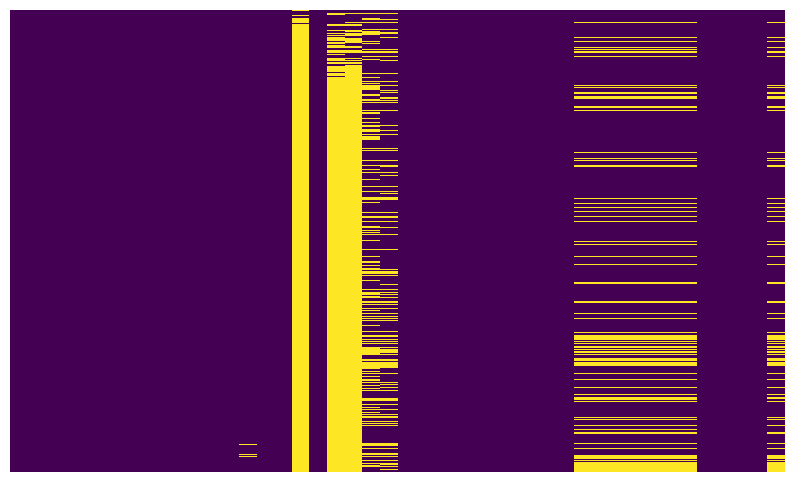

In [71]:
check_nan(listings)